In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("runs.csv.zip")
df.head()

,Start Time,Duration,Run ID,Name,Source Type,Source Name,User,Status,C,criterion,...,penalty,silent,solver,subsample,task_type,tree_method,accuracy,f1,precision,recall
0,2023-05-26 21:34:06,17.1min,fec72840538e443ba655c7e810cfe550,gradient with word_2_vec,PROJECT,file:///home/samoed/Desktop/ESGanalysis#experi...,samoed,FINISHED,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.781272,0.645210,0.712781,0.636632
1,2023-05-26 20:06:43,9.9min,b4f2cae230ec4cf6a113c28a938a6f81,xgboost with unfreeze_two_last,PROJECT,file:///home/samoed/Desktop/ESGanalysis#experi...,samoed,FINISHED,NaN,NaN,...,NaN,NaN,NaN,0.929947,NaN,gpu_hist,0.885395,0.822570,0.846904,0.809529
2,2023-05-26 19:56:47,9.9min,c6ab9fd275e64485962c8e0dc37aef92,catboost with unfreeze_two_last,PROJECT,file:///home/samoed/Desktop/ESGanalysis#experi...,samoed,FINISHED,NaN,NaN,...,NaN,True,NaN,NaN,GPU,NaN,0.881901,0.818199,0.830968,0.809858
3,2023-05-26 19:30:09,26.6min,1564319f94e34175be6e704d467bc1de,gradient with unfreeze_two_last,PROJECT,file:///home/samoed/Desktop/ESGanalysis#experi...,samoed,FINISHED,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.881202,0.812773,0.840164,0.797848
4,2023-05-26 19:24:47,5.3min,8051e8befc4f4e2887cbb8d3d9345c24,forest with unfreeze_two_last,PROJECT,file:///home/samoed/Desktop/ESGanalysis#experi...,samoed,FINISHED,NaN,entropy,...,NaN,NaN,NaN,NaN,NaN,NaN,0.875611,0.803278,0.840991,0.786159


In [3]:
df[["model", "data_type"]] = df["Name"].str.split(" with ", expand=True)
df[["model", "data_type"]]

,model,data_type
0,gradient,word_2_vec
1,xgboost,unfreeze_two_last
2,catboost,unfreeze_two_last
3,gradient,unfreeze_two_last
4,forest,unfreeze_two_last
...,...,...
61,catboost,word_2_vec_navec
62,catboost,word_2_vec
63,catboost,fast_text
64,catboost,tfidf


In [4]:
df = df[["model", "data_type", "f1"]]
df.head()

,model,data_type,f1
0,gradient,word_2_vec,0.645210
1,xgboost,unfreeze_two_last,0.822570
2,catboost,unfreeze_two_last,0.818199
3,gradient,unfreeze_two_last,0.812773
4,forest,unfreeze_two_last,0.803278


In [5]:
df.data_type.unique()

array(['word_2_vec', 'unfreeze_two_last', 'unfreeze_one_last',
       'rubert_reviews_parsed', 'rubert_reviews_sentence',
       'rubert_base_parsed', 'rubert_base_sentence', 'word_2_vec_navec',
       'fast_text', 'tfidf', 'bow'], dtype=object)

In [6]:
translated_xtick_labels = [
    "Разморожены 2 последних слоя",
    "Разморожен 1 последних слоя",
    "RuBERT эмоции обработанные",
    "RuBERT эмоции",
    "RuBERT базовый обработанные",
    "RuBERT базовый",
    "Word2Vec на Navec",
    "Word2Vec",
    "fastText",
    "TF-iDF",
    "Мешок слов",
]
translate = {
    "unfreeze_two_last": translated_xtick_labels[0],
    "unfreeze_one_last": translated_xtick_labels[1],
    "rubert_reviews_parsed": translated_xtick_labels[2],
    "rubert_reviews_sentence": translated_xtick_labels[3],
    "rubert_base_parsed": translated_xtick_labels[4],
    "rubert_base_sentence": translated_xtick_labels[5],
    "word_2_vec_navec": translated_xtick_labels[6],
    "word_2_vec": translated_xtick_labels[7],
    "fast_text": translated_xtick_labels[8],
    "tfidf": translated_xtick_labels[9],
    "bow": translated_xtick_labels[10],
}

In [7]:
df["data_type"] = df["data_type"].map(translate)

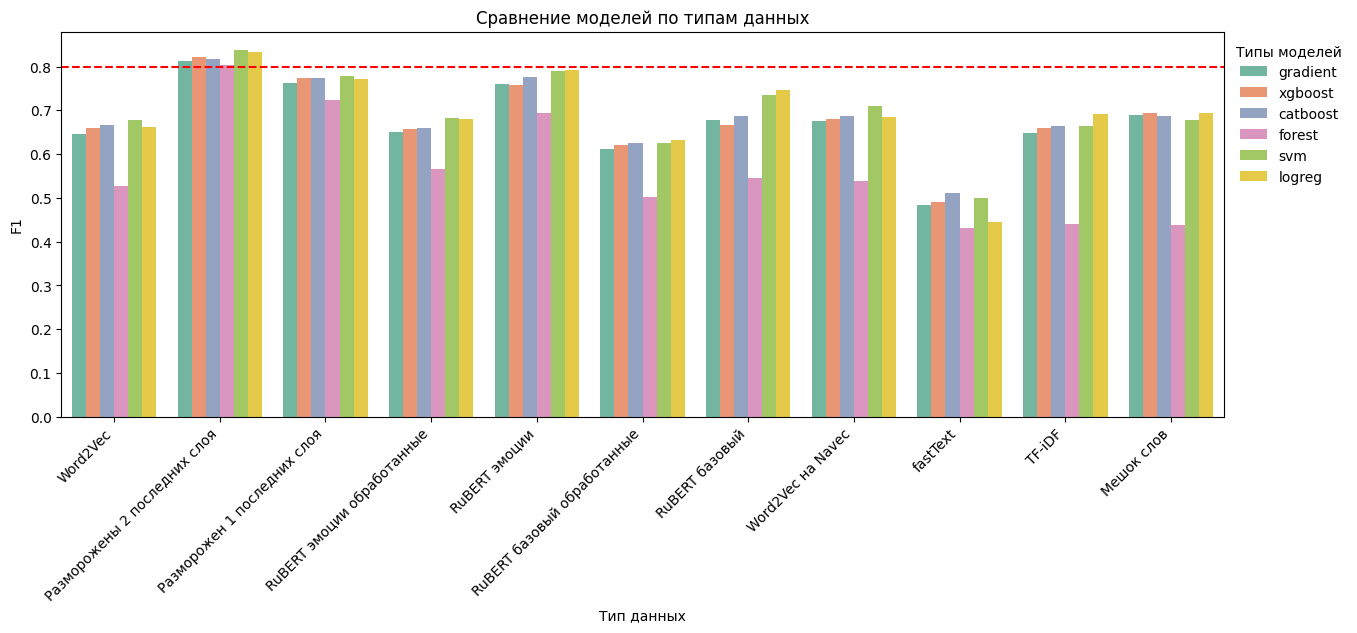

In [8]:
plt.figure(figsize=(15, 5))

with sns.color_palette():
    ax = sns.barplot(data=df, y="f1", hue="model", x="data_type", palette=sns.color_palette("Set2"))
    sns.move_legend(
        ax,
        "upper left",
        bbox_to_anchor=(1, 1),
        title="Типы моделей",
        frameon=False,
    )
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
    ax.set_xlabel("Тип данных")
    ax.set_ylabel("F1")
    ax.set_title("Сравнение моделей по типам данных")
    ax.axhline(y=0.8, color="r", linestyle="--")
    plt.savefig("runs.png", bbox_inches="tight", dpi=300, transparent=True)

In [9]:
df.head()

,model,data_type,f1
0,gradient,Word2Vec,0.645210
1,xgboost,Разморожены 2 последних слоя,0.822570
2,catboost,Разморожены 2 последних слоя,0.818199
3,gradient,Разморожены 2 последних слоя,0.812773
4,forest,Разморожены 2 последних слоя,0.803278


In [10]:
df.groupby(["model", "data_type"]).mean()

f1
model    data_type                             
catboost RuBERT базовый                0.686339
         RuBERT базовый обработанные   0.625848
         RuBERT эмоции                 0.775127
         RuBERT эмоции обработанные    0.660270
         TF-iDF                        0.664687
...                                         ...
xgboost  Word2Vec на Navec             0.679566
         fastText                      0.491714
         Мешок слов                    0.693216
         Разморожен 1 последних слоя   0.774366
         Разморожены 2 последних слоя  0.822570

[66 rows x 1 columns]

In [11]:
pivot_df = pd.pivot_table(df, index="data_type", columns="model", values="f1", aggfunc="mean")
pivot_df

model,catboost,forest,gradient,logreg,svm,xgboost
data_type,,,,,,
RuBERT базовый,0.686339,0.544982,0.677233,0.745666,0.734364,0.666909
RuBERT базовый обработанные,0.625848,0.502723,0.612595,0.632048,0.625827,0.621365
RuBERT эмоции,0.775127,0.692944,0.759111,0.792890,0.790298,0.758779
RuBERT эмоции обработанные,0.660270,0.566196,0.649625,0.680264,0.682753,0.656830
TF-iDF,0.664687,0.441295,0.647930,0.691746,0.663189,0.658944
Word2Vec,0.665459,0.526188,0.645210,0.662609,0.678660,0.658604
Word2Vec на Navec,0.687483,0.537904,0.676374,0.685695,0.710128,0.679566
fastText,0.511173,0.432266,0.484831,0.444813,0.500702,0.491714
Мешок слов,0.686418,0.437758,0.689835,0.693312,0.676922,0.693216


In [12]:
pivot_df = pivot_df.round(2)
with open("runs.md", "w") as f:
    f.write(pivot_df.to_markdown())